In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

sns.set_style("dark")
sns.set_context("notebook")

In [124]:
data_dir = 'data/raw_data/'

df = pd.read_csv(data_dir+'2022_Monthly_Service_Requests.csv')
df_2019 = pd.read_excel(data_dir+'SR-2019.xlsx')
df_2020 = pd.read_excel(data_dir+'SR-2020.xlsx')
df_2021 = pd.read_excel(data_dir+'2021_Monthly_Service_Requests_EN.xlsx')

df = pd.concat([df, df_2021, df_2020, df_2019], axis=0)
del df_2021, df_2020, df_2019

df.columns = [x.lower() for x in df.columns]
df['date_raised'] = pd.to_datetime(df['date_raised'])
df['week'] = df['date_raised'].dt.week

df = df.drop(['objectid'],axis=1)
df = df.reset_index()
df.to_csv('data/service_requests_2019_2020.csv', index=False)

/var/folders/3_/49qq58ns2r11fnng7d9pbd0w0000gn/T/ipykernel_61861/3717138367.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date_raised'].dt.week


 - which issue reasons have steadily increased over the past few years?
 - if previous years are included - how can data drift be measured?
 - what do major events or disruptions look like in 311 tickets?
 - which ticket categories are cyclic or seasonal? how can event time series be classified?
 
 
 dataset drift
 
 - new categories added, categories removed
 - majority of reasons and subjects are rarely used 
 - could an effective drift analysis be done with many rare categories?

In [23]:
print(df.subject.value_counts())
print(df.reason.value_counts())
print(df.type.value_counts())
print(df.channel.value_counts())


Roads and Transportation | Routes et Transports       415417
Garbage and Recycling | Déchets et Recyclage          371880
Bylaw Services | Service des Règlements Municipaux    227722
Water and the Environment | Eau et Environnement      106880
Recreation and Culture | Loisirs et Culture            29600
City Hall | Hôtel de Ville                             14765
Licenses and Permits | Licences et Permis               8353
Miscellaneous                                           7220
Social Community Service | Services Sociaux et Com      5784
Corp Complaints                                         5262
Health and Safety | Santé et Sécurité                   5156
Knowledge Management                                     336
Complaints                                                 1
Name: subject, dtype: int64
Solid Waste Collection | Collecte des Déchets    276446
Roads Maintenance | Entretien des Routes         197835
Parking Control | Gestion des Stationnements     131048
Recycle Bin

### Ward

In [24]:
# missing values in ward
df['ward'] = df['ward'].fillna('MISSING-WARD')

ward_mapping = {
 'RIVER': 'RIVER',
 'ORLÉANS': 'ORLÉANS',
 'BAY': 'BAY',
 'GLOUCESTER-SOUTHGATE': 'GLOUCESTER-SOUTHGATE',
 'ORL&#201;ANS': 'ORL&#201;ANS',
 'BEACON HILL-CYRVILLE': 'BEACON HILL-CYRVILLE',
 'RIDEAU-ROCKCLIFFE': 'RIDEAU-ROCKCLIFFE',
 'ALTA VISTA': 'ALTA VISTA',
 'INNES': 'INNES',
 'CUMBERLAND': 'CUMBERLAND',
 'KANATA NORTH': 'KANATA NORTH',
 'KITCHISSIPPI': 'KITCHISSIPPI',
 'COLLEGE': 'COLLEGE',
 'SOMERSET': 'SOMERSET',
 'BARRHAVEN': 'BARRHAVEN',
 'KNOXDALE-MERIVALE': 'KNOXDALE-MERIVALE',
 'RIDEAU-VANIER': 'RIDEAU-VANIER',
 'GLOUCESTER-SOUTH NEPEAN': 'GLOUCESTER-SOUTH NEPEAN',
 'OSGOODE': 'OSGOODE',
 'STITTSVILLE': 'STITTSVILLE',
 'KANATA SOUTH': 'KANATA SOUTH',
 'CAPITAL': 'CAPITAL',
 'WEST CARLETON-MARCH': 'WEST CARLETON-MARCH',
 'RIDEAU-GOULBOURN': 'RIDEAU-GOULBOURN',
 'ORL&#201;ANS': 'ORLÉANS',
 'Ward 3 BARRHAVEN': 'BARRHAVEN',
 'Ward 7 BAY': 'BAY',
 'Ward 17 CAPITAL': 'CAPITAL',
 'Ward 9 KNOXDALE-MERIVALE': 'KNOXDALE-MERIVALE',
 'Ward 10 GLOUCESTER-SOUTHGATE': 'GLOUCESTER-SOUTHGATE',
 'Ward 23 KANATA SOUTH': 'KANATA SOUTH',
 'Ward 1 ORLÉANS': 'ORLÉANS',
 'Ward 15 KITCHISSIPPI': 'KITCHISSIPPI',
 'Ward 21 RIDEAU-GOULBOURN': 'RIDEAU-GOULBOURN',
 'Ward 4 KANATA NORTH': 'KANATA NORTH',
 'Ward 12 RIDEAU-VANIER': 'RIDEAU-VANIER',
 'Ward 22 GLOUCESTER-SOUTH NEPEAN': 'GLOUCESTER-SOUTH NEPEAN',
 'Ward 18 ALTA VISTA': 'ALTA VISTA',
 'Ward 2 INNES': 'INNES',
 'Ward 8 COLLEGE': 'COLLEGE',
 'Ward 16 RIVER': 'RIVER',
 'Ward 13 RIDEAU-ROCKCLIFFE': 'RIDEAU-ROCKCLIFFE',
 'Ward 14 SOMERSET': 'SOMERSET',
 'Ward 19 CUMBERLAND': 'CUMBERLAND',
 'Ward 5 WEST CARLETON-MARCH': 'WEST CARLETON-MARCH',
 'Ward 20 OSGOODE': 'OSGOODE',
 'Ward 6 STITTSVILLE': 'STITTSVILLE',
 ' ': 'MISSING-WARD',
 'Ward 11 BEACON HILL-CYRVILLE': 'BEACON HILL-CYRVILLE',
 'Ward 17 West': 'CAPITAL',
 'Ward 12 East': 'RIDEAU-VANIER',
 'WARD 12 RIDEAU-VANIER': 'RIDEAU-VANIER'}


df['ward'] = df['ward'].map(ward_mapping, na_action='ignore')

In [25]:
df.ward.value_counts()

RIDEAU-VANIER              76569
SOMERSET                   69635
KITCHISSIPPI               63467
CAPITAL                    59879
BARRHAVEN                  59806
COLLEGE                    57739
GLOUCESTER-SOUTH NEPEAN    56459
CUMBERLAND                 54303
RIVER                      51689
KANATA SOUTH               50110
ALTA VISTA                 49903
RIDEAU-ROCKCLIFFE          47277
GLOUCESTER-SOUTHGATE       47204
STITTSVILLE                46785
ORLÉANS                    45283
INNES                      42981
BAY                        42029
KNOXDALE-MERIVALE          40494
KANATA NORTH               36731
RIDEAU-GOULBOURN           32538
BEACON HILL-CYRVILLE       31757
OSGOODE                    25859
WEST CARLETON-MARCH        25768
MISSING-WARD                 393
Name: ward, dtype: int64

In [6]:
def sorted_heatmap(data, x, y, z):
    #pivot
    ts_events = data.groupby([y, x], as_index=False)[z].count()
    ts_events = ts_events.pivot(y, x, z)
    ts_events = ts_events.reindex(ts_events.sum(axis=1).sort_values(ascending=False).index)
    sns.heatmap(ts_events)

In [17]:
# sorted_heatmap(df[df.ward!='MISSING-WARD'], 'week', 'ward', 'objectid')

Are 311 reports independent?

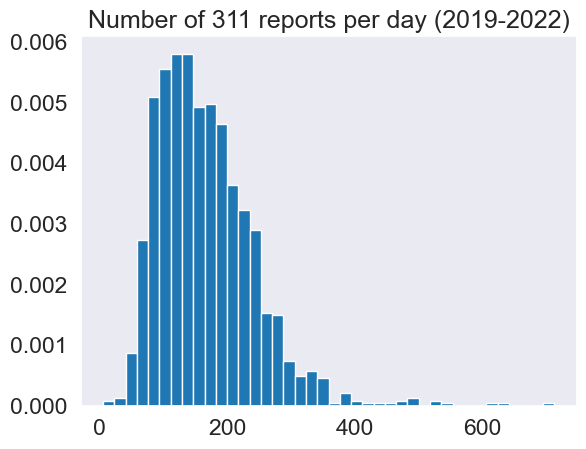

In [68]:
daily_reports = df.groupby(['subject','date_raised'], as_index=False)['index'].count()
bylaw_df = daily_reports[daily_reports['subject']=='Bylaw Services | Service des Règlements Municipaux']
bylaw_df['index'].hist(bins=40,density=True)
plt.title('Number of 311 reports per day (2019-2022)')
plt.ylabel('')
plt.xlabel('')
plt.grid()

In [66]:
print(bylaw_df['index'].describe())
lambda_bylaw = bylaw_df['index'].mean() 
n = bylaw_df.shape[0]

count    1366.000000
mean      166.707174
std        76.964836
min         6.000000
25%       111.000000
50%       154.000000
75%       207.000000
max       712.000000
Name: index, dtype: float64


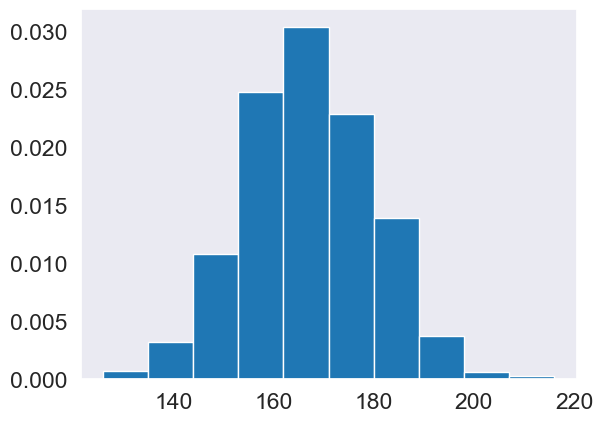

In [67]:
s = np.random.poisson(lambda_bylaw, n)
plt.hist(s, density=True)
plt.show()

In [71]:
bylaw_df.loc[bylaw_df['index'].idxmax()]

subject        Bylaw Services | Service des Règlements Munici...
date_raised                                  2019-12-01 00:00:00
index                                                        712
Name: 332, dtype: object

In [77]:
df[(df['date_raised']=='2019-12-01')& (df['subject']=='Bylaw Services | Service des Règlements Municipaux')]['type'].value_counts()

Dog Licensing                                       348
Cat Licensing                                       275
Music                                                22
Private Transportation Company                       11
Shouting                                             11
Parking - Yard                                        9
Dog Barking                                           8
Exterior Debris/Waste                                 5
Construction                                          4
Car Alarms                                            3
Dog Being Held                                        3
Building Exterior                                     2
Dumping on Road                                       1
Animal/Lost Pet                                       1
Stoop and Scoop                                       1
Info-Noise                                            1
Injured Animal                                        1
Dog Bite                                        

Text(0.5, 12.44444444444443, 'Count(By-law events)')

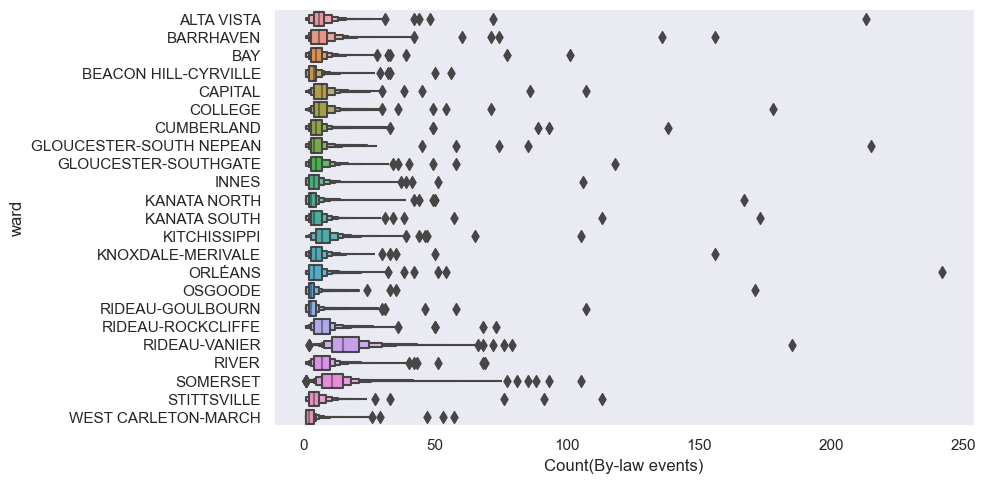

In [111]:
bylaw_ward_reports = df[df['subject']=='Bylaw Services | Service des Règlements Municipaux'].groupby(['ward','date_raised'], as_index=False)['index'].count()

sns.catplot(
    data=bylaw_ward_reports,
    x="index", y="ward",
    kind="boxen",
    orient='h',
    height=5,
    aspect=2
)
plt.xlabel('Count(By-law events)')

In [ ]:
# is this because of outliers?
bylaw_ward_reports[bylaw_ward_reports['index']<20].groupby('ward').agg({
    'index':['mean','var','std','count']
})

In [120]:
new_home_reports = df[df['type']=='New Home'].groupby('date_raised',as_index=False)['index'].count()

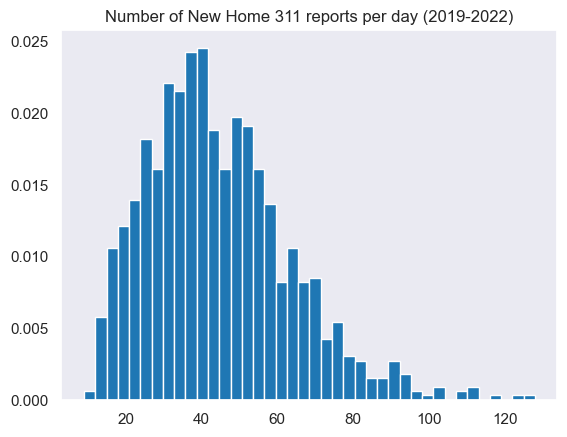

In [121]:
new_home_reports['index'].hist(bins=40,density=True)
plt.title('Number of New Home 311 reports per day (2019-2022)')
plt.ylabel('')
plt.xlabel('')
plt.grid()

In [123]:
#overdispersion?
# If overdispersion is a feature, an alternative model with additional free parameters may provide a better fit.
# In the case of count data, a Poisson mixture model like the negative binomial distribution can be proposed inste
# https://en.wikipedia.org/wiki/Overdispersion
# http://www.stat.ucla.edu/~dinov/courses_students.dir/Applets.dir/NormalApprox2PoissonApplet.html normal approx

print(new_home_reports['index'].mean())
print(new_home_reports['index'].var())

44.144404332129966
362.17063713356765
